<a href="https://colab.research.google.com/github/bahu1610/Portfolio_Optimization/blob/main/PortfolioComparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My Dream Portfolio vs Crooked S&P 500**

Hey, I am Samarth, a newbie in financial markets. I was just wondering if I had choice to create my dream portfolio and money is not a problem, would I be able to beat the S&P 500 let's say over a 3 year period?
This led me to craete this portfolio optimizer project, let's find out!

Let me also see whether the S&P is highly weighed towards its top stocks or not?

In [ ]:
# Importing the relevant libraries

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

*Since I have information arbitrage as I am creating a lookback, my dream portfolio would consist of the [following](htthttps://tradethatswing.com/best-performing-stocks-in-the-last-year-3-5-and-10-years/ps://):*

1.   ADMA Biologics, Inc. (ADMA)
2.   Super Micro Computer (SMCI)
3.   Viking Therapeautics (VKTX)
4.   FTAI Aviation (FTAI)
5.   Celestia (CLS)



In [ ]:
# Set 3 years date from today

from datetime import date
start_date = date.today() - pd.DateOffset(years=3)
end_date = date.today()

In [ ]:
# Downloading data for my dream portfolio:

ADMA = yf.download('ADMA', start=start_date, end=end_date)
SMCI = yf.download('SMCI', start = start_date, end = end_date)
VKTX = yf.download('VKTX', start = start_date, end = end_date)
FTAI = yf.download('FTAI', start = start_date, end = end_date)
CLS = yf.download('CLS', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Combining the final prices of all the datasets
Dream_pf = pd.concat([ADMA["Adj Close"], SMCI["Adj Close"], VKTX["Adj Close"], FTAI["Adj Close"], CLS["Adj Close"]], axis = 1)
Dream_pf.columns = ["ADMA", "SMCI", "VKTX", "FTAI", "CLS"]
Dream_pf = Dream_pf.round(2)
Dream_pf.head()

,ADMA,SMCI,VKTX,FTAI,CLS
Date,,,,,
2021-09-07,1.27,36.72,6.57,20.31,9.27
2021-09-08,1.18,36.33,6.60,19.11,9.06
2021-09-09,1.19,36.48,6.65,19.57,8.82
2021-09-10,1.19,36.59,6.60,19.11,8.75
2021-09-13,1.18,37.13,6.64,18.76,8.75


In [ ]:
# Finding daily stock returns i.e. {(Current/Previous) - 1} * 100

Daily_returns = Dream_pf.pct_change()
Daily_returns.head()

,ADMA,SMCI,VKTX,FTAI,CLS
Date,,,,,
2021-09-07,NaN,NaN,NaN,NaN,NaN
2021-09-08,-0.070866,-0.010621,0.004566,-0.059084,-0.022654
2021-09-09,0.008475,0.004129,0.007576,0.024071,-0.026490
2021-09-10,0.000000,0.003015,-0.007519,-0.023505,-0.007937
2021-09-13,-0.008403,0.014758,0.006061,-0.018315,0.000000


While the daily return data might provide some sense on to daily sensitivity of prices, we are more inclined towards looking at the total returns generated on a cumulative basis to compare the last results

In [ ]:
Cum_returns = (1+Daily_returns).cumprod()
Cum_returns.tail()

,ADMA,SMCI,VKTX,FTAI,CLS
Date,,,,,
2024-08-30,13.629921,11.919935,9.759513,6.292959,5.492988
2024-09-03,13.047244,12.031046,8.887367,5.806499,5.010787
2024-09-04,13.283465,11.532407,8.843227,5.879370,5.032362
2024-09-05,13.181102,11.290850,8.430746,5.853274,4.951456
2024-09-06,12.803150,10.524510,8.238965,5.541605,4.426106


In [ ]:
# Now calculate the total cumulative returns of your 5 stock protfolio on a daily basis

Cum_total = Cum_returns.sum(axis = 1)

# Averaging for 5 stocks
Cum_total = Cum_total/5
Cum_total.tail()

,0
Date,
2024-08-30,9.419063
2024-09-03,8.956589
2024-09-04,8.914166
2024-09-05,8.741486
2024-09-06,8.306867


In [ ]:
# Reframing the dataframe

Portfolio = pd.DataFrame(Cum_total)
Portfolio.reset_index(inplace=True)
Portfolio.columns = ['Date', 'Total Returns']
Portfolio.shape

(755, 2)

In [ ]:
# Now considering the S&P 500 dataset

SP = yf.download('^GSPC', start=start_date, end=end_date)
SP_data = SP["Adj Close"]
SP_data.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-09-07,4520.029785
2021-09-08,4514.069824
2021-09-09,4493.279785
2021-09-10,4458.580078
2021-09-13,4468.729980


In [ ]:
# Similarly daily and cumulative returns
Daily_SP = SP_data.pct_change()
Cum_SP = (1+Daily_SP).cumprod()
Cum_SP.head()

,Adj Close
Date,
2021-09-07,NaN
2021-09-08,0.998681
2021-09-09,0.994082
2021-09-10,0.986405
2021-09-13,0.988651


In [ ]:
# Manipulating the dataframe

SP_ret = pd.DataFrame(Cum_SP)
SP_ret.reset_index(inplace=True)
SP_ret.columns = ['Date', 'Total Returns']
SP_ret.shape

(755, 2)

In [ ]:
# Now both S&P and Dream Portfolio have the same shape of data.
# However, we would have a more smoother analysis if we do a monthly sampling
# rather than a daily average data comparison

SP_ret = SP_ret.resample('M', on = 'Date').last()
Portfolio = Portfolio.resample('M', on = 'Date').last()


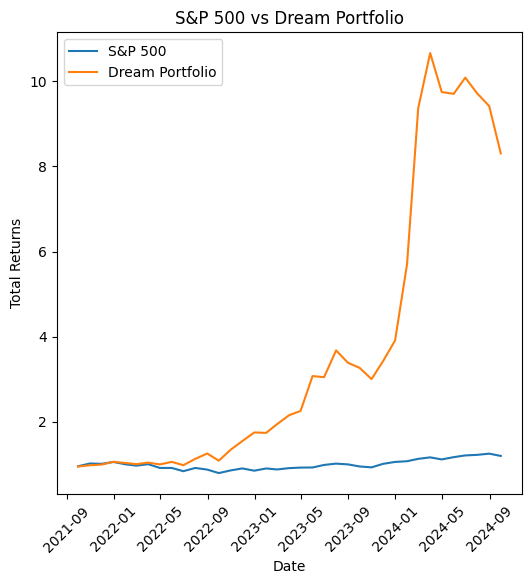

In [ ]:
# Plotting the final graphs
# Resample method does not keep the original date frame as we had made

plt.figure(figsize=(6,6))
plt.plot(SP_ret.index, SP_ret['Total Returns'], label='S&P 500')
plt.plot(Portfolio.index, Portfolio['Total Returns'], label='Dream Portfolio')
plt.title("S&P 500 vs Dream Portfolio")
plt.xlabel("Date")
plt.ylabel("Total Returns")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Comparing the difference of portfolio value at the last entry

SP_ret_last = SP_ret['Total Returns'].iloc[-1]
Portfolio_last = Portfolio['Total Returns'].iloc[-1]
Excess = round(((Portfolio_last/SP_ret_last)-1)*100,2)

print(f"With information arbitrage, we generate a phenomenal {Excess}% excess returns from our dream portfolio")

With information arbitrage, we generate a phenomenal 594.24% excess returns from our dream portfolio


## Now checking how much the first 5 stock dominate the movements within S&P 500 over a monthly 3 year basis

Also to note, the top 5 stocks by weight in S&P 500 are:


1.  APPLE (AAPL):	6.97%
2. 	MICROSOFT (MSFT):	6.74%
3. 	NVIDIA (NVDA):	6.33%
4. 	AMAZON.COM, INC (AMZN):	3.39%
5. 	META PLATFORMS INC, CLASS A (META):	2.52%

P.S.: I do not track this nor am I a mathematical genius, I have sourced this from [`here`](https://www.investopedia.com/best-25-sp500-stocks-8550793)

In [ ]:
# Downloading the stock price data

AAPL = yf.download('AAPL', start = start_date, end = end_date)
MSFT = yf.download('MSFT', start = start_date, end = end_date)
NVDA = yf.download('NVDA', start = start_date, end = end_date)
AMZN = yf.download('AMZN', start = start_date, end = end_date)
META = yf.download('META', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Creating the top 5 S&P portfolio

Top_SP = pd.concat([AAPL["Adj Close"], MSFT["Adj Close"], NVDA["Adj Close"], AMZN["Adj Close"], META["Adj Close"]], axis = 1)
Top_SP.columns = ["APPL", "MSFT", "NVDA", "AMZN", "META"]
Top_SP = Top_SP.round(2)
Top_SP.head()

,APPL,MSFT,NVDA,AMZN,META
Date,,,,,
2021-09-07,154.11,292.64,22.63,175.46,381.40
2021-09-08,152.56,292.67,22.30,176.27,376.80
2021-09-09,151.53,289.79,22.14,174.21,377.22
2021-09-10,146.52,288.28,22.44,173.46,377.91
2021-09-13,147.09,289.53,22.12,172.86,375.74


In [ ]:
# Calculating the cumulative returns of the stocks
Five = Top_SP.pct_change()
Cum_five = (1+Five).cumprod()
Cum_five.head()

,APPL,MSFT,NVDA,AMZN,META
Date,,,,,
2021-09-07,NaN,NaN,NaN,NaN,NaN
2021-09-08,0.989942,1.000103,0.985418,1.004616,0.987939
2021-09-09,0.983259,0.990261,0.978347,0.992876,0.989040
2021-09-10,0.950749,0.985101,0.991604,0.988601,0.990850
2021-09-13,0.954448,0.989373,0.977464,0.985182,0.985160


In [ ]:
# Calculating the average portfolio returns from top 5 S&P stock

Port_five = Cum_five.sum(axis = 1)
Port_five = Port_five/5
Port_five.head()

,0
Date,
2021-09-07,0.000000
2021-09-08,0.993604
2021-09-09,0.986757
2021-09-10,0.981381
2021-09-13,0.978325


In [ ]:
Portfolio_five = pd.DataFrame(Port_five)
Portfolio_five.columns = ['Total Returns']
Portfolio_five.shape
Cum_port_five = Portfolio_five.resample("M").last()

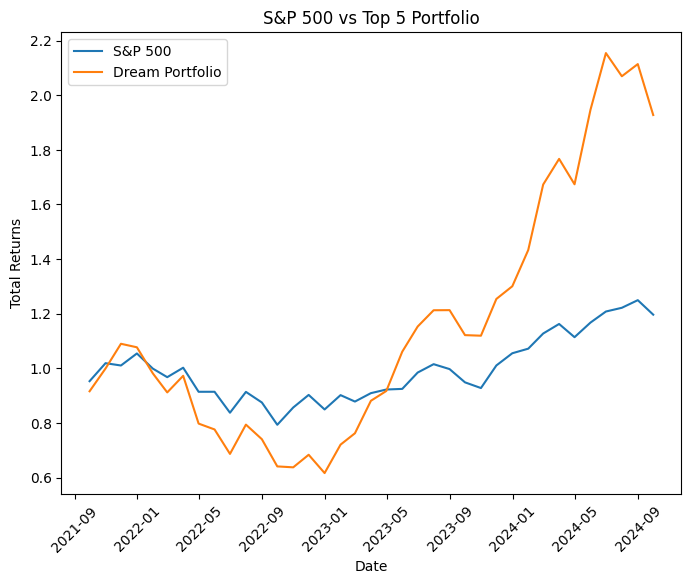

In [ ]:
# Plotting both to see similarities in returns

plt.figure(figsize=(8, 6))
plt.plot(SP_ret.index, SP_ret['Total Returns'], label='S&P 500')
plt.plot(Cum_port_five.index, Cum_port_five['Total Returns'], label='Dream Portfolio')
plt.title("S&P 500 vs Top 5 Portfolio")
plt.xlabel("Date")
plt.ylabel("Total Returns")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### To check how large of an influence we will analyze the differences in datapoints between two portfolios

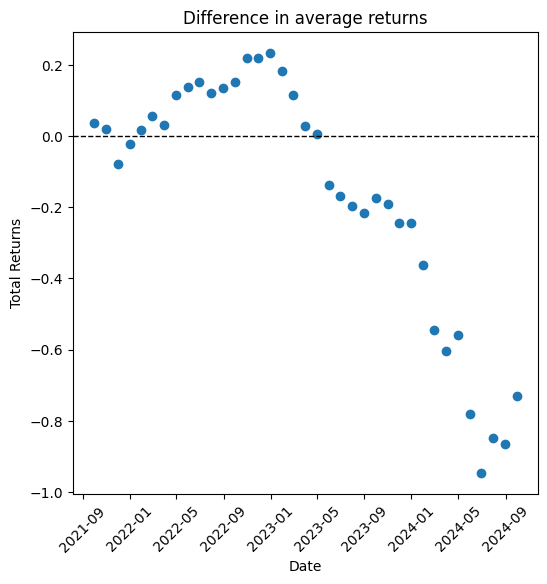

In [ ]:
return_diff = SP_ret['Total Returns'] - Cum_port_five['Total Returns']
plt.figure(figsize = (6,6))
plt.scatter(return_diff.index, return_diff, label = "Diff in average return")
plt.title("Difference in average returns")
plt.axhline(0, color ='black', linestyle = '--', linewidth = 1)
plt.xlabel("Date")
plt.ylabel("Total Returns")
plt.xticks(rotation=45)
plt.show()

The return difference between the S&P 500 and top 5 S&P stocks highlight a significant factor: The top 5 stocks post 2023 are dominating the S&P 500 making the returns of the index on an average pull upwards.
